Write a small program that looks for the BUSCOs of differnt assemblies plots and plots them out.

In [1]:
%matplotlib inline

In [2]:
import os
from Bio import SeqIO
import pandas as pd
import re
from pybedtools import BedTool
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#import rcParams and make it outfit also when saving files
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [3]:
#define base folders
BUSCO_BASE_FOLDER = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/busco/Pst_104E_v12'
FIGURE_FOLDER = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/figures'

In [4]:
#first sort out the combined BUSCO of p and h
fn_p = os.path.join(BUSCO_BASE_FOLDER, 'run_Pst_104E_v12_p_ctg.anno.protein.fa.protein')
busco_header = ['busco', 'status', 'protein_ID', 'Score', 'Length']
Busco_p = pd.read_csv(os.path.join(fn_p, 'full_table_Pst_104E_v12_p_ctg.anno.protein.fa.protein.tsv'),\
                     header=None, names=busco_header, sep='\t', comment='#')

Complete_busco_p = Busco_p

In [5]:
#first sort out the combined BUSCO of p and h
fn_h = os.path.join(BUSCO_BASE_FOLDER, 'run_Pst_104E_v12_h_ctg.anno.protein.fa.protein')
Busco_h = pd.read_csv(os.path.join(fn_h, 'full_table_Pst_104E_v12_h_ctg.anno.protein.fa.protein.tsv'),\
                     header=None, names=busco_header, sep='\t', comment='#')
Complete_busco_h = Busco_h

In [6]:
#check for Buscos that are missing or fragmented in p
m_or_f_in_p = Complete_busco_p[(Complete_busco_p.status == 'Missing') | (Complete_busco_p.status == 'Fragmented')]

In [7]:
#get all h buscos that are missing in p
p_missing_replaced = Complete_busco_h[(Complete_busco_h.busco.isin(Complete_busco_p[(Complete_busco_p.status == 'Missing')]['busco']))\
                &(Complete_busco_h.status != 'Missing')]

In [8]:
#get all h buscos that are fragmented in p and not Missing or Fragmented in h
p_fragmented_replaced = Complete_busco_h[(Complete_busco_h.busco.isin(Complete_busco_p[(Complete_busco_p.status == 'Fragmented')]['busco']))\
                &(Complete_busco_h.status != 'Missing')&(Complete_busco_h.status != 'Fragmented')]

In [9]:
#now remove all the buscos that will be replaced
Fixed_total_busco = Complete_busco_p[(~Complete_busco_p.busco.isin(p_missing_replaced.busco.append(p_fragmented_replaced.busco))) ]


In [10]:
Fixed_total_busco = pd.concat([Fixed_total_busco, p_missing_replaced, p_fragmented_replaced])

In [11]:
Pst_104E_ph = Fixed_total_busco.groupby('status')['busco'].count()

In [12]:
total_buscos = len(Fixed_total_busco[Fixed_total_busco.duplicated(['busco', 'status'], keep=False)]['busco'].unique()) + Pst_104E_ph[0]
total_buscos = pd.Series([total_buscos], name='total_buscos')

In [13]:
Pst_104E_ph = Pst_104E_ph.append(total_buscos).reset_index(drop=True)

In [14]:
busco_index = ['Complete and single-copy BUSCOs', 'Complete and duplicated BUSCOs', 'Fragmented BUSCOs', 'Missing BUSCOs', 'Complete BUSCOs']

In [15]:
Pst_104E_ph.index = busco_index

In [16]:
Pst_104E_p = pd.Series([1121, 133, 48, 33, 1254], index= busco_index)
Pst_104E_h = pd.Series([1052,93,42,148,1145], index= busco_index)
Pst_78 = pd.Series([1135, 141,40,19,1276], index= busco_index)
Pst_130 = pd.Series([1005, 27, 181,122,1032], index= busco_index)
Pst_0821 = pd.Series([599,5,439,292,604], index= busco_index)
Pst_43 = pd.Series([933,25,245,132,958], index= busco_index)
Pst_887 = pd.Series([471,6,425,433,477], index= busco_index)
Pst_21 = pd.Series([942,35,224,134,977], index= busco_index)

In [17]:
SBusco_df = pd.concat([Pst_104E_p, Pst_104E_h, Pst_104E_ph, Pst_78, Pst_130, Pst_0821, Pst_43, Pst_887,Pst_21 ], axis=1)
names=['Pst-104E p', 'Pst-104E h', 'Pst-104E ph', 'Pst-78', 'Pst-130', 'Pst-0821', 'Pst-43', 'Pst-887','Pst-21' ]
SBusco_df.rename(columns=dict(zip(SBusco_df.columns, names)), inplace=True)

In [18]:
SBusco_df_sorted = SBusco_df.T.sort_values(by='Complete BUSCOs' ,ascending=False)

In [19]:
#now add a fake fragmented column to plot it as the first column in the plot
SBusco_df_sorted['Fake Fragmented'] = SBusco_df_sorted['Fragmented BUSCOs'] + SBusco_df_sorted['Complete BUSCOs']

In [20]:
SBusco_df_sorted

,Complete and single-copy BUSCOs,Complete and duplicated BUSCOs,Fragmented BUSCOs,Missing BUSCOs,Complete BUSCOs,Fake Fragmented
Pst-104E ph,1145,308,24,19,1292,1316
Pst-78,1135,141,40,19,1276,1316
Pst-104E p,1121,133,48,33,1254,1302
Pst-104E h,1052,93,42,148,1145,1187
Pst-130,1005,27,181,122,1032,1213
Pst-21,942,35,224,134,977,1201
Pst-43,933,25,245,132,958,1203
Pst-0821,599,5,439,292,604,1043
Pst-887,471,6,425,433,477,902


/home/benjamin/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


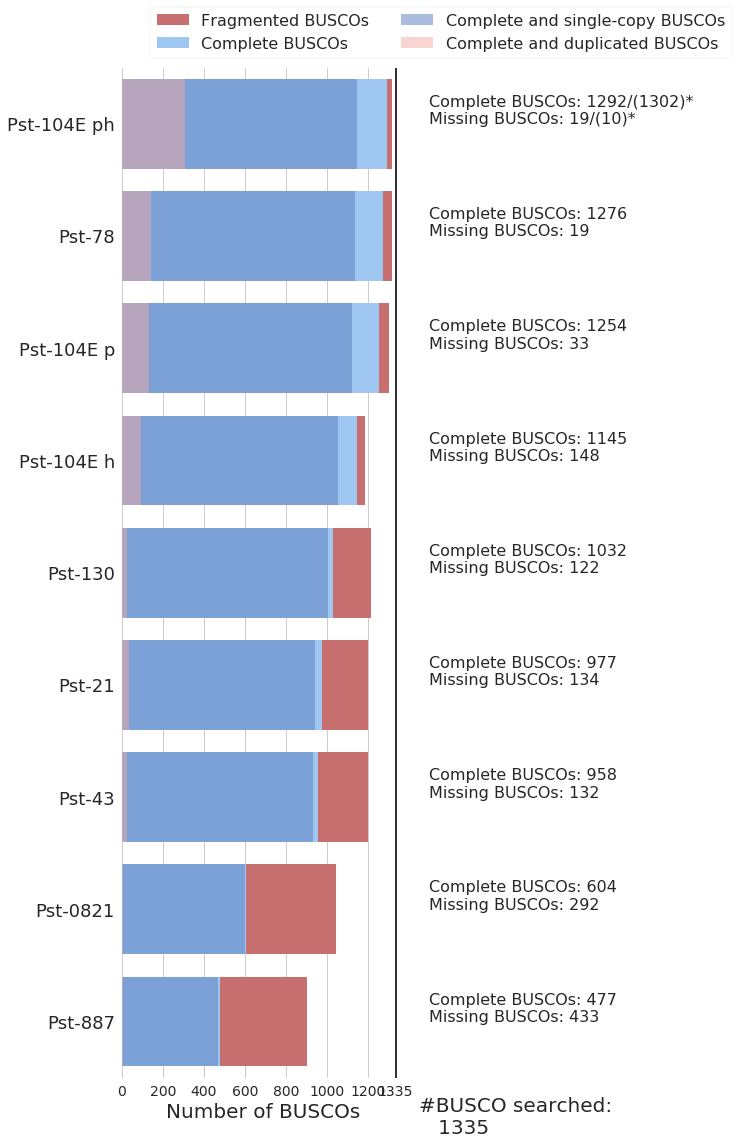

In [27]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
#set the font size 
fs = 20

sns.set_color_codes("muted")
sns.barplot(x='Fake Fragmented',y=SBusco_df_sorted.index, data=SBusco_df_sorted, label='Fragmented BUSCOs', color='r',alpha=1  )

sns.set_color_codes("pastel")
sns.barplot(x='Complete BUSCOs',y=SBusco_df_sorted.index, data=SBusco_df_sorted, label='Complete BUSCOs', color='b',alpha=1 )

sns.set_color_codes("muted")
sns.barplot(x='Complete and single-copy BUSCOs',y=SBusco_df_sorted.index, data=SBusco_df_sorted, label='Complete and single-copy BUSCOs', color='b', alpha=0.5 )

sns.set_color_codes("pastel")
sns.barplot(x='Complete and duplicated BUSCOs',y=SBusco_df_sorted.index, data=SBusco_df_sorted, label='Complete and duplicated BUSCOs', color='r',alpha=0.5  )



# Add a legend and informative axis label
ax.legend(ncol=2, loc=(0.1, 1.01), frameon=True,fancybox=True, fontsize = 16)
count = 0
for y, complete, missing in zip(np.arange(0, 9, 1),SBusco_df_sorted['Complete BUSCOs'], SBusco_df_sorted['Missing BUSCOs'] ):
    if count == 0:
        ax.text(1500, y, 'Complete BUSCOs: %i/(1302)*\nMissing BUSCOs: %i/(10)*' % (complete, missing)\
           ,{'fontsize' : 16})

    else:
        ax.text(1500, y, 'Complete BUSCOs: %i\nMissing BUSCOs: %i' % (complete, missing)\
           ,{'fontsize' : 16})
    count += 1
plt.xlabel('Number of BUSCOs', {'fontsize' : fs})
plt.axvline(x=1335,  color='k')
ax.text(1450,9, '#BUSCO searched:\n   1335',{'fontsize' : fs})
sns.despine(left=True, bottom=True)
plt.xticks([0, 200,400,600,800,1000,1200,1335] )
ax.tick_params(axis = 'y', labelsize=18)
ax.tick_params(axis = 'x', labelsize=14)
plt.savefig(os.path.join(FIGURE_FOLDER, 'Busco_summary_figure.png'), dpi=600, bbox_inches="tight")

In [22]:
np.arange(-0.2, 7.8, 1)

array([-0.2,  0.8,  1.8,  2.8,  3.8,  4.8,  5.8,  6.8])

In [23]:
for y, complete, missing in zip(np.arange(-0.2, 7.8, 1),SBusco_df_sorted['Complete BUSCOs'], SBusco_df_sorted['Missing BUSCOs'] ):
    print(y, complete, missing)

-0.2 1292 19
0.8 1276 19
1.8 1254 33
2.8 1145 148
3.8 1032 122
4.8 977 134
5.8 958 132
6.8 604 292


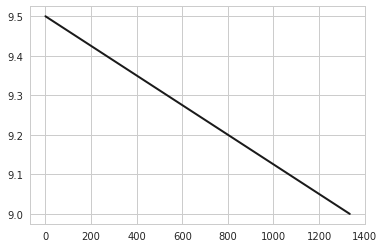

In [24]:
plt.plot([1335, 0], [9, 9.5], color='k', linewidth=2)